## Imports


In [24]:
import csv

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


# Activity 1:

Read an image file with a colour-depth of at least 24-bit (i.e., an 8-bit for each of the RGB components) (e.g., c_small.png).

Display the image and its "shape" (width x height x # of colour components)


In [25]:
# Helper Functions
def display_image(path):
    """
    Display an image from the given file path using Matplotlib and print its shape

    Parameters:
        path (str): The file path to the image file.

    Returns:
        numpy.ndarray or None: The image data as a NumPy array if the file is found, None otherwise.

    Raises:
        FileNotFoundError: If the specified file path does not exist.
    """
    try:
        # Open image
        img = mpimg.imread(path)

        # Display the image
        plt.imshow(img, vmin=0, vmax=255)
        plt.show()

        # Display the shape
        print(f"Image's shape is: {img.shape}")

        return img

    except FileNotFoundError:
        print("Could not find the file!")


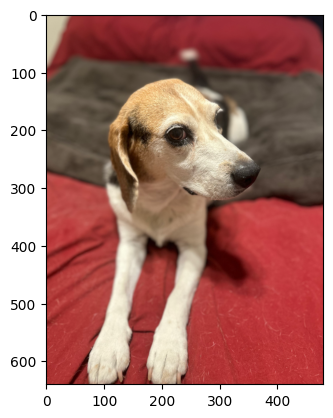

Image's shape is: (640, 480, 3)


In [26]:
# Display the image and shape
img = display_image("given_files/c_small.png")


# Activity 2:

Extract RGB colour components to an array/list of RGB components


In [27]:
# Helper Functions
def extract_all_colors(img):
    """
    Reshape a 3D array into a 2D array where the second dimension is each of the RGB values in one list
    It takes the shape from (height, width, 3) to (height * width, 3)

    Parameters:
        img (numpy.ndarray): The input image represented as a NumPy array with shape (height, width, RGB)

    Returns:
        numpy.ndarray: The 2D NumPy array
    """
    return img.reshape(-1, img.shape[2])


In [28]:
all_colors = extract_all_colors(img)

print(f"Shape of all colours is: {all_colors.shape}")
print(f"All colours: {all_colors}")


Shape of all colours is: (307200, 3)
All colours: [[0.827451   0.7882353  0.68235296]
 [0.827451   0.7882353  0.68235296]
 [0.8235294  0.78431374 0.6784314 ]
 ...
 [0.73333335 0.2        0.21176471]
 [0.74509805 0.21960784 0.22745098]
 [0.7411765  0.21176471 0.22745098]]


## Activity 3:

Find a set of unique colours used in the image. This should typically reduce the size of the list/array you obtained above that contains all the colours because many colours are duplicated (i.e., will be at most the same size, but it's extremely unlikely for regular pictures).

Also find the frequency of each colour appearing in the image (i.e., how many pixels each of the unique colours appears on).

Display a histogram of the unique colours as well as the palette/colour map of the image. While I said a "histogram," you should probably use a line graph instead of bars for this, especially when the number of unique colours is large (which can take a very long time to process).


In [29]:
# Helper Functions
def get_unique_colors_freq_indices(all_colors):
    """
    Retrieve unique colors, their frequencies, and indices of first appearance from an array.

    Args:
        all_colors (numpy.ndarray): An array containing all the color values in RGB.

    Returns:
        tuple: A tuple containing three numpy arrays:
            - The first array contains unique colors found in the input array.
            - The second array contains the frequencies of each unique color.
            - The third array contains the indices of the first appearance of each unique color
              in the input array.
    """
    return np.unique(all_colors, axis=0, return_counts=True, return_index=True)


def display_freq_histogram(frequencies):
    """
    Display a histogram plot of unique color frequencies.

    Parameters:
        frequencies (numpy.ndarray): An array of frequencies of unique colors.

    Returns:
        None: This function displays the histogram using Matplotlib.
    """
    plt.plot(frequencies)
    plt.title("Histogram of Unique Colors")
    plt.xlabel("Colors")
    plt.ylabel("Frequency")
    plt.show()


def display_colormap(all_colors, indices):
    """
    Generate a colormap of the unique colors displayed in an NxN grid.

    Parameters:
        all_colors (numpy.ndarray): A 2D NumPy array representing all colors in the image with RGB values.
        unique_colors (numpy.ndarray): A 2D NumPy array containing unique colors from the image with RGB values.
        indices (numpy.ndarray): A 1D NumPy array containing the indices of the first appearance of unique colors.

    Returns:
        None: This function displays the colormap using Matplotlib.
    """
    # Create the list of unsorted colors
    unsorted_unique_colors = [all_colors[index] for index in sorted(indices)]

    # Determine grid size and create empty grid
    num_colors = len(unsorted_unique_colors)
    grid_size = int(np.ceil(np.sqrt(num_colors)))
    grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)

    # Assign each unsorted color to respective (row, col) coordinate
    for i, color in enumerate(unsorted_unique_colors):
        row, col = divmod(i, grid_size)  # equivalent to (x // y, x % y)
        grid[row, col] = (color * 255).astype(
            np.uint8
        )  # scale the unique colors from ranges [0, 1] to [0, 255]

    # Display the grid of colors using imshow
    plt.imshow(grid, vmin=0, vmax=255)
    plt.title("Colormap of Unique Colors")

    plt.show()


Shape of unique colours is: (75533, 3)
Unique colours: [[0.01176471 0.00784314 0.        ]
 [0.01568628 0.00784314 0.00392157]
 [0.01568628 0.01176471 0.00392157]
 ...
 [1.         1.         0.8666667 ]
 [1.         1.         0.87058824]
 [1.         1.         0.91764706]]
Frequencies: [4 1 1 ... 1 1 1]


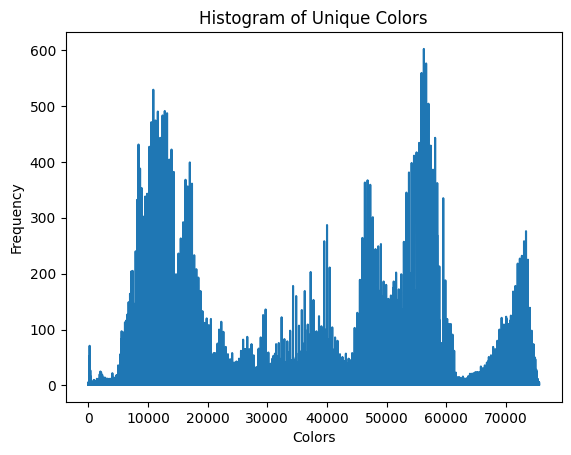

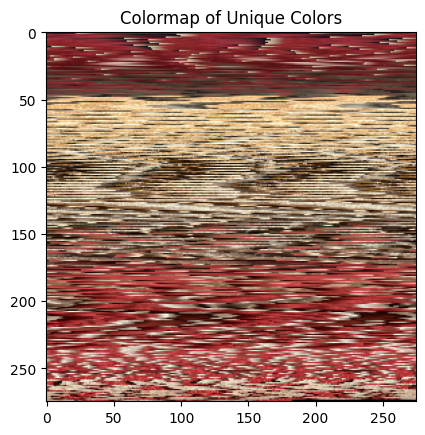

In [30]:
# Find unique colors and frequencies
unique_colors, indices, frequencies = get_unique_colors_freq_indices(
    all_colors)

print(f"Shape of unique colours is: {unique_colors.shape}")
print(f"Unique colours: {unique_colors}")

# Display frequencies
print(f"Frequencies: {frequencies}")

# Display a "histogram" of the unique colors
display_freq_histogram(frequencies)

# Display the colourmap
display_colormap(all_colors, indices)


## Activity 4:

Export all the data (all the colours extracted, unique colours, and frequencies) to CSV files, respectively named, "all_colours.csv," "unique_colours.csv," and "unique_freq.csv."


In [31]:
def create_csv(f_name, array):
    """
    Create a CSV file from a list or a 2D array and save it with the specified file name.

    Parameters:
        f_name (str): The name of the CSV file to be created.
        array (list or numpy.ndarray): The data to be saved in CSV file. It can be a list or a 2D NumPy array.

    Returns:
        None: Saves the CSV file and prints a success message upon completion.
    """
    with open(f_name, "w", encoding="utf-8", newline="") as f:
        w = csv.writer(f)

        if isinstance(array, list):
            for item in array:
                w.writerow([item])
        else:
            w.writerows(array)

    print(f"Successfully saved {f_name}")


# Create CSV of all colours
create_csv("output/all_colours.csv", all_colors)

# Create CSV of unique colors
create_csv("output/unique_colours.csv", unique_colors)

# Create CSV of frequencies. This one isnt a 2D array so process differently
create_csv("output/unique_freq.csv", frequencies.tolist())


Successfully saved output/all_colours.csv
Successfully saved output/unique_colours.csv
Successfully saved output/unique_freq.csv


## Activity 5:

From the original image data, reduce the colour depth to 3-bit for each RGB component, then repeat the same steps as above but with the reduced colour image


In [32]:
# Helper Functions
def reduce_color_depth(path):
    """
    Opens an image from the given file path using Matplotlib, then performs a quantization process to reduce the color depth from
    24 bit (8 bit for each color component) to 3 bit by:
        - Bringing color values from range [0, 1] to [0, 7] by multiplying values by 7
        - converting the values from floats to unsigned 8bit integers
        - normalizing the values back to the range [0,1] by dividing by 7

    Parameters:
        path (str): The file path to the image file.

    Returns:
        numpy.ndarray: The image data as a NumPy array
    """
    img = mpimg.imread(path)

    # Quantization to 3 bits, bring values to range [0,7] then convert to ints, which is where the compression occurs
    quantized_image = (img * 7).astype(np.uint8)

    # Normalize back to values in range [0,1]
    img = quantized_image / 7.0

    # Display the image
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()

    # Display the shape
    print(f"Image's shape is: {img.shape}")

    return img

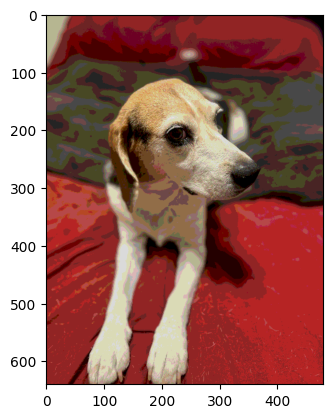

Image's shape is: (640, 480, 3)


In [33]:
# Quantize the image, display image and shape
img = reduce_color_depth("given_files/c_small.png")

# Activity 6:

Extract RGB colour components to an array/list of RGB components


In [34]:
all_colors = extract_all_colors(img)

print(f"Shape of all colours is: {all_colors.shape}")
print(f"All colours: {all_colors}")


Shape of all colours is: (307200, 3)
All colours: [[0.71428571 0.71428571 0.57142857]
 [0.71428571 0.71428571 0.57142857]
 [0.71428571 0.71428571 0.57142857]
 ...
 [0.71428571 0.14285714 0.14285714]
 [0.71428571 0.14285714 0.14285714]
 [0.71428571 0.14285714 0.14285714]]


## Activity 7:

Find a set of unique colours used in the image. With the reduced color image, you should get a reall small number of unique colors for the obvious reason!

Find the frequency of each colour appearing in the image.

Display a histogram of the unique colours as well as the palette/colour map of the reduced color image.


Shape of unique colours is: (66, 3)
Unique colours: [[0.         0.         0.        ]
 [0.         0.         0.14285714]
 [0.14285714 0.         0.        ]
 [0.14285714 0.         0.14285714]
 [0.14285714 0.14285714 0.        ]
 [0.14285714 0.14285714 0.14285714]
 [0.28571429 0.         0.        ]
 [0.28571429 0.         0.14285714]
 [0.28571429 0.14285714 0.        ]
 [0.28571429 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.        ]
 [0.28571429 0.28571429 0.14285714]
 [0.28571429 0.28571429 0.28571429]
 [0.42857143 0.         0.        ]
 [0.42857143 0.         0.14285714]]
Frequencies: [ 2675     1  7477    52  2117  6461  9390   199  2503 20892     1 23477
 11605  6294  5339]


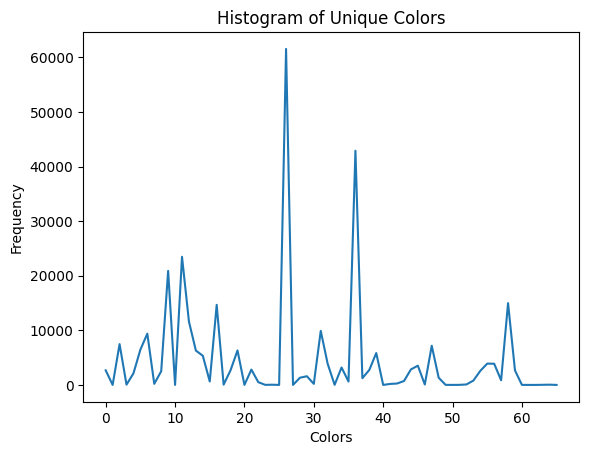

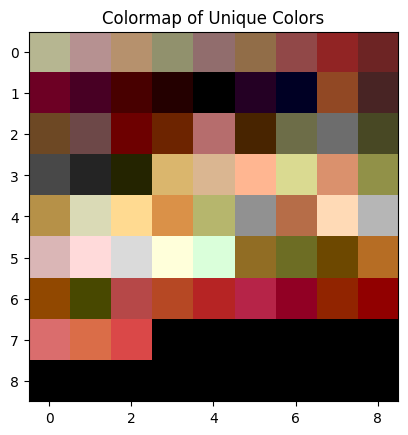

In [35]:
# Find unique colors and frequencies
unique_colors, indices, frequencies = get_unique_colors_freq_indices(
    all_colors)

print(f"Shape of unique colours is: {unique_colors.shape}")
print(f"Unique colours: {unique_colors[:15]}")  # Truncate what is printed

# Display frequencies
print(f"Frequencies: {frequencies[:15]}")  # Truncate what is printed

# Display a "histogram" of the unique colors
display_freq_histogram(frequencies)

# Display the colourmap
display_colormap(all_colors, indices)


## Activity 8:

Export all the data (all the colours extracted, unique colours, and frequencies) to CSV files, respectively named, "all_colours_reduced.csv," "unique_colours_reduced.csv," and "unique_freq_reduced.csv."


In [36]:
# Create CSV of all reduced colours
create_csv("output/all_colours_reduced.csv", all_colors)

# Create CSV of unique reduced colors
create_csv("output/unique_colours_reduced.csv", unique_colors)

# Create CSV of reduced frequencies. This one isnt a 2D array so process differently
create_csv("output/unique_freq_reduced.csv", frequencies.tolist())


Successfully saved output/all_colours_reduced.csv
Successfully saved output/unique_colours_reduced.csv
Successfully saved output/unique_freq_reduced.csv
